<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%2010/Tutorial10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset 1

In [24]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pandas.read_csv("slip_data.csv")
f1 = np.array(df['f1'])
f1ang = np.array(df['f1ang'])
f2 = np.array(df['f2'])
f2ang = np.array(df['f2ang'])
m = np.array(df['m'])
slips = np.array(df['slips'])

# X is only f2, f2ang as other parameters are held constant
X = np.concatenate((f2.reshape(len(f2), 1), f2ang.reshape(len(f2ang), 1)), axis=1)
y = slips.reshape(len(slips), 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

npx = 200
npy = 200

x1line = np.linspace(0,40, npx)
x2line = np.linspace(0,360, npy)

x1grid, x2grid = np.meshgrid(x1line, x2line)

# produce an grid array with all grid values
Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

[[ 21.95254016 213.43689748]
 [ 28.60757465   3.62293044]
 [ 24.11053504 171.29743051]
 ...
 [ 37.53648087 172.83881057]
 [  9.14586204 231.79105322]
 [ 27.08564576 180.63832705]]
[[0.00000000e+00 0.00000000e+00]
 [2.01005025e-01 0.00000000e+00]
 [4.02010050e-01 0.00000000e+00]
 ...
 [3.95979899e+01 3.60000000e+02]
 [3.97989950e+01 3.60000000e+02]
 [4.00000000e+01 3.60000000e+02]]


Epoch 1/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.6800
Epoch 2/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.6447
Epoch 3/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.6125
Epoch 4/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.5824
Epoch 5/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.5546
Epoch 6/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.5287
Epoch 7/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.5061
Epoch 8/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.4862
Epoch 9/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.4701
Epoch 10/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4573
Epoch 11/1200
32/32 [==============================] - 0s 2ms/step - loss: 0.4471
Epoch 12/1200
32/32 [==============================] - 0s 1ms/step - loss: 0.4402
Epoch 13/1200
32/32 [====

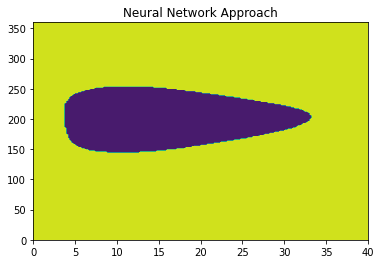

In [25]:
# Neural Network Solution
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
y_binary = to_categorical(y)

fig, ax = plt.subplots()

model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=2))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer='adam')
model.fit(X_scaled, y_binary, epochs=1200, batch_size=32)

# predict using scaled values of Xgrid (as model was trained on scaled values)
y_plot = model.predict(scaler.transform(Xgrid))
# Plotting probabilities: y_plot = np.reshape(y_plot[:,1], [npx,npy])
y_plot =  np.reshape(np.argmax(y_plot, axis=-1), [npx,npy])
plt.contourf(x1line, x2line, y_plot)
plt.title("Neural Network Approach")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


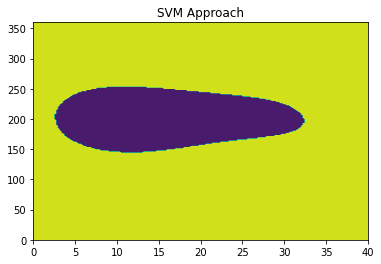

In [26]:
# SVM Solution
from sklearn.svm import SVC
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#QUESTION: do we use scaled values for SVM as well
# define support vector machine
svm = SVC(C=1000, gamma='scale' , kernel='rbf')
svm.fit(X_scaled, y)

classVals = svm.predict(scaler.transform(Xgrid))
classVals = np.reshape(classVals, [npx,npy])  #reshape
plt.contourf(x1line, x2line, classVals) # plot contour
#ax.scatter(X[slips==0, 0], X[slips==0, 1])
#ax.scatter(X[slips==1, 0], X[slips==1, 1])
plt.title("SVM Approach")
plt.show()

Answers to part B:
1. SVM was chosen as it is the quicker solution, both computationally and time-wise.
2. ML is able to automate the prediction without the need for calculations. 
3. ML is unnecessary when an understanding of the physics makes the analytical solution a suitable predictor. ML predictors would also show higher bias to training datasets than an analytical solution.

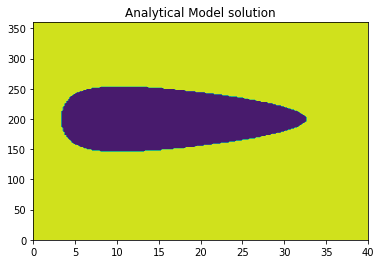

In [27]:
import matplotlib.pyplot as plt

m_model = 3
f1_model = 18
f1ang_model = 20
mu = 0.5
friction_f = m_model*9.81*mu
f1_vert = f1_model*np.sin(f1ang_model*np.pi/180)
f1_hoz = f1_model*np.cos(f1ang_model*np.pi/180)
y_model = []

for i in range(0, len(Xgrid)):
  f2_vert = Xgrid[i,0]*np.sin(Xgrid[i,1]*np.pi/180)
  f2_hoz = Xgrid[i,0]*np.cos(Xgrid[i,1]*np.pi/180)
  resultant = np.sqrt(((f1_hoz+f2_hoz)**2) + ((f1_vert+f2_vert)**2))
  if resultant>friction_f:
    y_model+= [1]
  else:
    y_model+= [0]
y_model = np.array(y_model).reshape([npx,npy])
plt.contourf(x1line, x2line, y_model) # plot contour
plt.title("Analytical Model solution")
plt.show()

## Dataset 2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


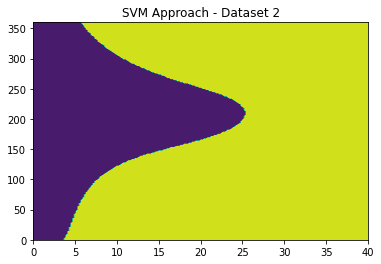

In [28]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_2 = pandas.read_csv("slip_data_full.csv")
f1_2 = np.array(df_2['f1'])
f1ang_2 = np.array(df_2['f1ang'])
f2_2 = np.array(df_2['f2'])
f2ang_2 = np.array(df_2['f2ang'])
m = np.array(df_2['m'])
slips_2 = np.array(df_2['slips'])

# X is f1, f1ang, f2, f2ang as other parameters are held constant
X2 = np.concatenate((f1_2.reshape(len(f1_2), 1), f1ang_2.reshape(len(f1ang_2), 1), f2_2.reshape(len(f2_2), 1), f2ang_2.reshape(len(f2ang_2), 1)), axis=1)
y2 = slips_2.reshape(len(slips_2), 1)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# SVM Solution
from sklearn.svm import SVC
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# define support vector machine
svm = SVC(C=1000, gamma='scale' , kernel='rbf')
svm.fit(X2_scaled, y2)

# Add f1=10, f1ang=30, to the prediction
f1_2_plot = np.full(shape=len(Xgrid),fill_value=10)
f1ang_2_plot = np.full(shape=len(Xgrid),fill_value=30)
Xplot = np.concatenate((f1_2_plot.reshape(len(f1_2_plot), 1), f1ang_2_plot.reshape(len(f1ang_2_plot), 1), Xgrid), axis=1)

classVals = svm.predict(scaler2.transform(Xplot))
classVals = np.reshape(classVals, [npx,npy])  #reshape
plt.contourf(x1line, x2line, classVals) # plot contour
#ax.scatter(X2[slips==0, 0], X2[slips==0, 1])
#ax.scatter(X2[slips==1, 0], X2[slips==1, 1])
plt.title("SVM Approach - Dataset 2")
plt.show()

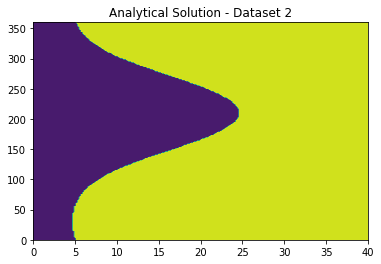

In [29]:
# Analytical decision function for 2nd dataset (f1=10, f1ang=30)
import matplotlib.pyplot as plt

m_model = 3
f1_model = 10
f1ang_model = 30
mu = 0.5
friction_f = m_model*9.81*mu
f1_vert = f1_model*np.sin(f1ang_model*np.pi/180)
f1_hoz = f1_model*np.cos(f1ang_model*np.pi/180)
y_model = []

for i in range(0, len(Xgrid)):
  f2_vert = Xgrid[i,0]*np.sin(Xgrid[i,1]*np.pi/180)
  f2_hoz = Xgrid[i,0]*np.cos(Xgrid[i,1]*np.pi/180)
  resultant = np.sqrt(((f1_hoz+f2_hoz)**2) + ((f1_vert+f2_vert)**2))
  if resultant>friction_f:
    y_model+= [1]
  else:
    y_model+= [0]
y_model = np.array(y_model).reshape([npx,npy])
plt.contourf(x1line, x2line, y_model) # plot contour
plt.title("Analytical Solution - Dataset 2")
plt.show()

**Answer to part E:**

4 features are varying now (f1, f1ang, f2, f2ang) and so a greater number of points are required to accurately fit the SVM for the range of f1 and f1ang.